# Frequent Statistics


*   install the appropriate library such as dplyr,tidyverse,forecast,tidyr,car. 





In [ ]:
install.packages("dplyr")

In [87]:
library('dplyr')

In [ ]:
install.packages("tidyverse")

In [90]:
library(forcats)

In [91]:
library(tidyverse)

In [92]:
library(tidyr)

In [93]:
options(warn=-1)

In [ ]:
install.packages("car")

In [109]:
library(car)


*   Read the csv file of the collge data.




## Data Exploration


In [94]:
df = read.csv('collegeData.csv')



*   Show the first six rows by using the head function for the data exploration.



In [95]:
head(df)

,SexCode,MaritalCode,PrevEdCode,DDVeteran,DaysEnrollToStart,AgeAtStart,AgeAtGrad,GPA,MinutesAttended,HoursAttempt,HoursEarned,HoursReq,MinutesAbsent,TransferCredits,TransferGPA,MinEFC,MaxENTEntranceScore,gradFlag
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>
1,M,M,BACH,0,55,24,27,3.22,145953,2925,2550,2565,3475,19.00,2.55,0,81.0,1
2,F,M,BACH,0,143,22,25,3.02,129045,2640,2565,2565,11840,12.00,NA,0,89.5,1
3,F,S,BACH,0,98,30,33,3.47,111385,2559,2514,2565,935,37.67,2.84,0,NA,1
4,F,UN,BACH,0,101,24,27,3.19,135401,2520,2520,2565,4549,6.00,NA,0,87.5,1
5,M,NULL,SOMECOLL,0,61,19,22,3.84,115660,2520,2520,2565,1340,22.00,NA,3141,NA,1
6,F,UN,SOMECOLL,0,69,20,22,3.45,134521,2520,2520,2565,5784,9.00,NA,60,NA,1




*   Understand the data, use str function to understand the column name, type and sample of the data in the columns, and the number of the rows and columns.


In [96]:
str(df)

'data.frame':	2784 obs. of  18 variables:
 $ SexCode            : chr  "M" "F" "F" "F" ...
 $ MaritalCode        : chr  "M" "M" "S" "UN" ...
 $ PrevEdCode         : chr  "BACH" "BACH" "BACH" "BACH" ...
 $ DDVeteran          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ DaysEnrollToStart  : int  55 143 98 101 61 69 70 144 77 150 ...
 $ AgeAtStart         : int  24 22 30 24 19 20 21 20 17 23 ...
 $ AgeAtGrad          : int  27 25 33 27 22 22 23 23 21 26 ...
 $ GPA                : num  3.22 3.02 3.47 3.19 3.84 3.45 3.69 2.64 3.08 3.7 ...
 $ MinutesAttended    : int  145953 129045 111385 135401 115660 134521 124157 52801 139196 120865 ...
 $ HoursAttempt       : num  2925 2640 2559 2520 2520 ...
 $ HoursEarned        : num  2550 2565 2514 2520 2520 ...
 $ HoursReq           : int  2565 2565 2565 2565 2565 2565 2565 2565 2565 2565 ...
 $ MinutesAbsent      : int  3475 11840 935 4549 1340 5784 6098 704 3459 2135 ...
 $ TransferCredits    : num  19 12 37.7 6 22 ...
 $ TransferGPA        : num  2.55 NA 2

## t- test




*   found the test for the numerical value of the data so, the first select the column no 5 to 17. 
*   then filter the data by grad flag column.


*   Then found the t test for all the data and found the mean for the all columns.





In [113]:
t_test = data.frame()
for (i in 5:17){
  first = leveneTest(df[[i]] ~as.logical(df$gradFlag))
  if(a$`Pr(>F)`[1] > 0.05){
    second = t.test(df[[i]] ~ as.logical(df$gradFlag), mu = 0, alternative = 'two.sided', var.eq = TRUE)}
  else{
    second = t.test(df[[i]] ~ as.logical(df$gradFlag), mu = 0, alternative = 'two.sided', var.eq = FALSE)
      }
    t_test[i-4,1] = colnames(df)[i]
    t_test[i-4,2] = round(second$estimate['mean in group FALSE'],2)
    t_test[i-4,3] = round(second$estimate['mean in group TRUE'],2)
    t_test[i-4,4] = round(second$p.value,3)
}



*   Then change the columns and use name which is shown in question.



In [119]:
colnames(t_test) = c("Feature","Mean(Drop-Group)","Mean(Grad-Group)","p.value")



*   plot the the t_test for the all numeric data.



In [120]:
t_test

,Feature,Mean(Drop-Group),Mean(Grad-Group),p.value
,<chr>,<dbl>,<dbl>,<dbl>
1,DaysEnrollToStart,70.99,71.20,0.907
2,AgeAtStart,25.32,25.63,0.192
3,AgeAtGrad,28.22,28.26,0.862
4,GPA,2.32,3.40,0.000
5,MinutesAttended,46425.10,122184.36,0.000
6,HoursAttempt,1081.31,2553.41,0.000
7,HoursEarned,901.83,2498.69,0.000
8,HoursReq,2301.13,2462.64,0.000
9,MinutesAbsent,2699.44,3289.11,0.000


## chi-square test


In [47]:
df %>% count(df$PrevEdCode)

df$PrevEdCode,n
<chr>,<int>
ASSOC,363
BACH,474
GED,5
HS,232
MAST,17
POSTHS,2
SOMECOLL,1683
UN,8


In [49]:
df %>% count(df$MaritalCode)

df$MaritalCode,n
<chr>,<int>
D,42
M,221
NULL,988
P,17
S,725
UN,791


In [131]:
prevedcode1 = droplevels(df[!df$PrevEdCode == 'GED',])
prevedcode2 = droplevels(data1[!prevedcode1$PrevEdCode == 'POSTHS',])
prevedcode3 = droplevels(data2[!prevedcode2$PrevEdCode == 'UN',])
levels(factor(prevedcode3$PrevEdCode))

[1] "ASSOC"    "BACH"     "HS"       "MAST"     "SOMECOLL"

In [51]:
data4 = data3[,c(1:4)]
suppressWarnings(data4%>%
  summarise_each(funs(chisq.test(.,
                                 data3$gradFlag)$p.value), -one_of("gradFlag")))

SexCode,MaritalCode,PrevEdCode,DDVeteran
<dbl>,<dbl>,<dbl>,<dbl>
1.717049e-05,2.043386e-20,1.378934e-47,0.6385329


**Reccomendation**



*   for t-test,in this most of the cases the p-value 0.05. It is good for the dataset.because the p-value is less than 0.05 we reject the null hypothesis.

*  for chi-test, in this most of the cases the the p-value 0.05.it is good for the dataset.because we reject the null and conclude that the varience are different,



## Linear regression




*   First,we remove the 0 gpa rows form the dataset for the multiple linear regression.




In [129]:
gpa = df[df$GPA != 0, ]

In [130]:
min(gpa$GPA)

[1] 0.21



*   select the approprite column for the multiple linear regression.



In [124]:
gpa1 = gpa[,-c(7,9,10,11,12,13,18)] 
head(gpa1)

,SexCode,MaritalCode,PrevEdCode,DDVeteran,DaysEnrollToStart,AgeAtStart,GPA,TransferCredits,TransferGPA,MinEFC,MaxENTEntranceScore
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,M,M,BACH,0,55,24,3.22,19.00,2.55,0,81.0
2,F,M,BACH,0,143,22,3.02,12.00,NA,0,89.5
3,F,S,BACH,0,98,30,3.47,37.67,2.84,0,NA
4,F,UN,BACH,0,101,24,3.19,6.00,NA,0,87.5
5,M,NULL,SOMECOLL,0,61,19,3.84,22.00,NA,3141,NA
6,F,UN,SOMECOLL,0,69,20,3.45,9.00,NA,60,NA




*   Find the multiple linear regression with respect to the GPA to all the columns.

*   Use summary function to understand all parameter about the this multiple linear regression.




Found that 


*   Adusted R-squared is 0.2609.

*  p value is very small which is 2.2e-16.
 
*  Multiple R-squared is 0.2784
*  F- statistic is 15.86.

In [125]:
m = lm(GPA~.,data = gpa1)
summary(m)


Call:
lm(formula = GPA ~ ., data = gpa1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.38966 -0.18540  0.06859  0.28083  1.16908 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          6.252e-01  3.640e-01   1.718   0.0863 .  
SexCodeM            -8.702e-02  4.216e-02  -2.064   0.0394 *  
MaritalCodeM         1.284e-01  1.644e-01   0.781   0.4350    
MaritalCodeNULL     -9.063e-02  1.603e-01  -0.565   0.5720    
MaritalCodeP         2.023e-01  2.101e-01   0.963   0.3360    
MaritalCodeS         1.056e-01  1.630e-01   0.648   0.5172    
MaritalCodeUN        1.519e-02  1.725e-01   0.088   0.9298    
PrevEdCodeBACH       1.747e-01  5.546e-02   3.150   0.0017 ** 
PrevEdCodeHS         8.287e-02  2.360e-01   0.351   0.7256    
PrevEdCodeMAST      -8.713e-02  1.948e-01  -0.447   0.6548    
PrevEdCodeSOMECOLL  -1.308e-02  4.428e-02  -0.295   0.7678    
PrevEdCodeUN        -8.579e-01  4.630e-01  -1.853   0.0643 .  
DDVeteran           

## Residual Analysis 

Find the residual for the the linear regresion model. 

In [25]:
deside = resid(m)



*   Plot the residual plot for the gpa and for residual.


*  plot the regression line in red color on the residual plot.





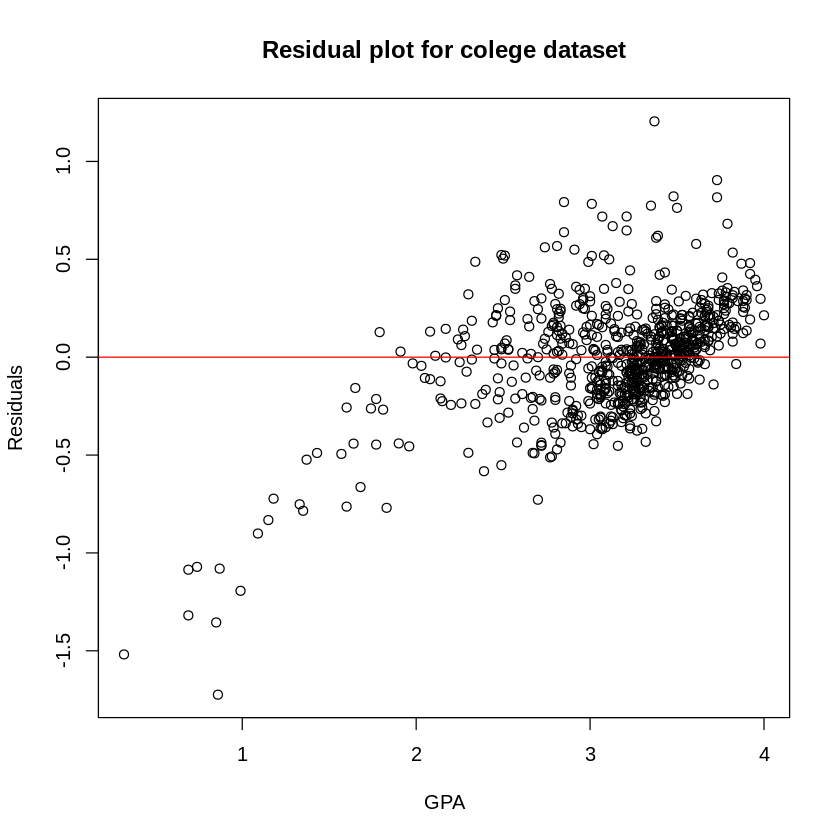

In [26]:
plot(data$GPA,deside,ylab = "Residuals",xlab = "GPA",main = "Residual plot for colege dataset",col ="black")
abline(0,0,col = "red")



*   plot the qnorm of residual of multiple regression line.
*   plot the qline of residual of multiple regression line.



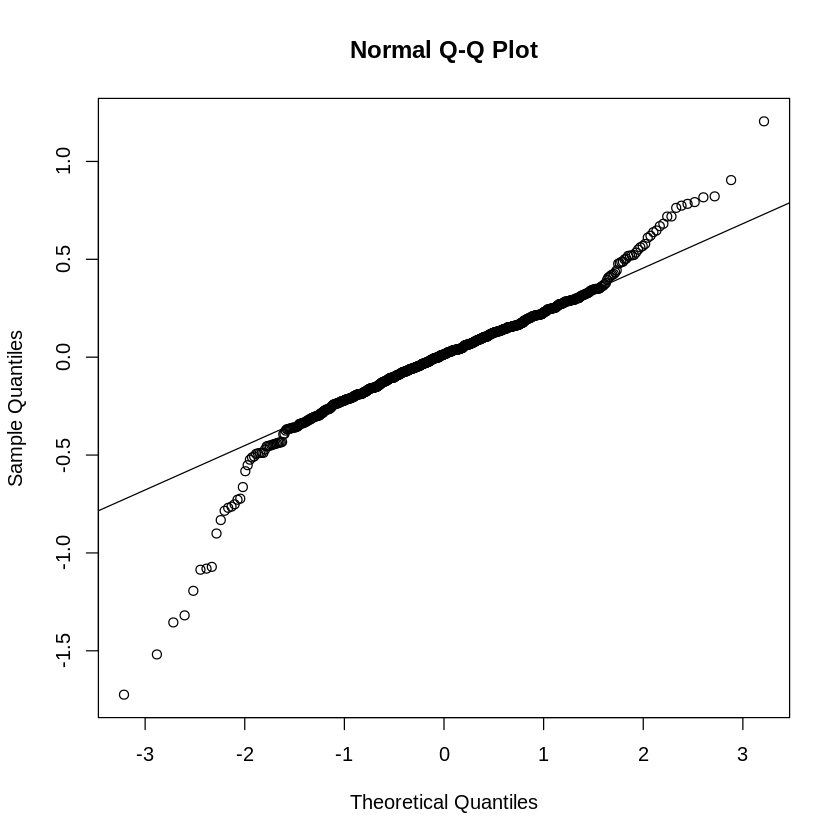

In [27]:
qqnorm(deside)
qqline(deside)

## Summary

*   I like to give advice to stackholder that Adusted R-squared is 0.2609,p value is very small which is 2.2e-16,Multiple R-squared is 0.2784,F- statistic is 15.86.



*  This is good that p-value is very less.

